In [1]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential

In [2]:
# Instantiate the Xception model
Xception_model = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the pre-trained model
for layer in Xception_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential([
    Xception_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # Replace num_classes with the number of classes in your dataset
])

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generators for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    'Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_trainf',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

Found 7910 images belonging to 6 classes.
Found 2451 images belonging to 6 classes.


In [4]:
# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [5]:
# Train the model using the testing data
history = model.fit(train_generator, epochs=20, validation_data=test_generator)
# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20


248/248 [==============================] - 1906s 7s/step - loss: 0.9154 - accuracy: 0.7097 - val_loss: 0.4310 - val_accuracy: 0.9017
Epoch 2/20
248/248 [==============================] - 1766s 7s/step - loss: 0.5028 - accuracy: 0.8329 - val_loss: 0.3037 - val_accuracy: 0.9494
Epoch 3/20
248/248 [==============================] - 1736s 7s/step - loss: 0.3976 - accuracy: 0.8655 - val_loss: 0.2705 - val_accuracy: 0.9510
Epoch 4/20
248/248 [==============================] - 1725s 7s/step - loss: 0.3413 - accuracy: 0.8874 - val_loss: 0.2667 - val_accuracy: 0.9490
Epoch 5/20
248/248 [==============================] - 1724s 7s/step - loss: 0.3017 - accuracy: 0.8987 - val_loss: 0.2426 - val_accuracy: 0.9551
Epoch 6/20
248/248 [==============================] - 1722s 7s/step - loss: 0.2705 - accuracy: 0.9088 - val_loss: 0.2348 - val_accuracy: 0.9555
Epoch 7/20
248/248 [==============================] - 1725s 7s/step - loss: 0.2496 - accuracy: 0.9176 - val_loss: 0.2342 - val_accurac

In [6]:
model.save('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Xception.h5')

C:\Users\Ramkumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(





1/1 [==============================] - 9s 9s/step


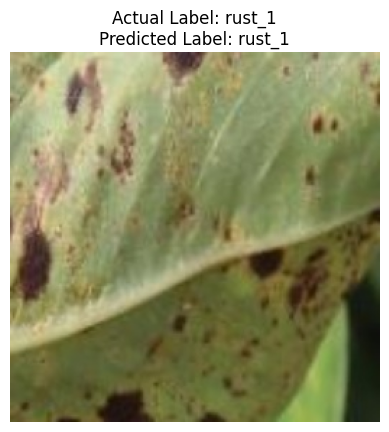

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained Xception model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Xception.h5')

# Load the leaf image and resize it to 299x299 (Xception model input size)
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/rust_1/dr_0_1811.jpg"
img = image.load_img(img_path, target_size=(256, 256))  # Adjust the target size to 299x299
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)

# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "rust_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 5s 5s/step


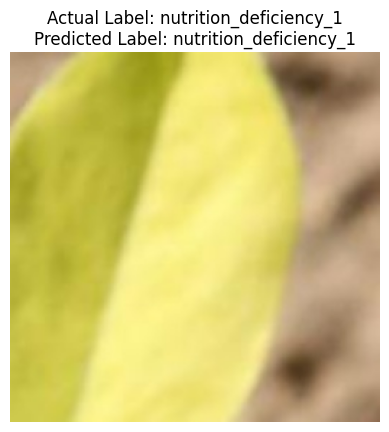

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained Xception model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Xception.h5')

# Load the leaf image and resize it to 299x299 (Xception model input size)
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/nutrition_deficiency_1/dr_0_1059.jpg"
img = image.load_img(img_path, target_size=(256, 256))  # Adjust the target size to 299x299
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)

# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "nutrition_deficiency_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 3s 3s/step


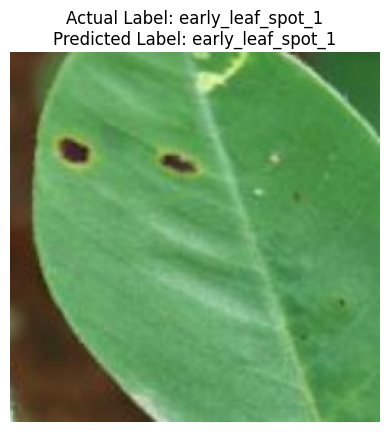

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained Xception model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Xception.h5')

# Load the leaf image and resize it to 299x299 (Xception model input size)
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/early_leaf_spot_1/dr_0_1531.jpg"
img = image.load_img(img_path, target_size=(256, 256))  # Adjust the target size to 299x299
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)

# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "early_leaf_spot_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 4s 4s/step


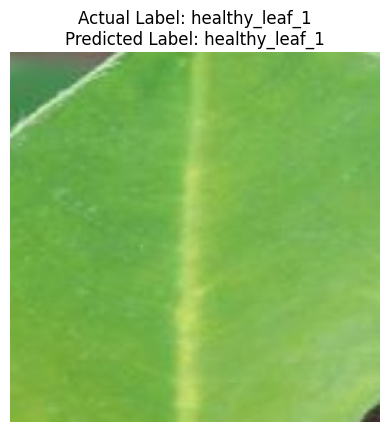

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained Xception model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Xception.h5')

# Load the leaf image and resize it to 299x299 (Xception model input size)
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/healthy_leaf_1/dr_0_4503.jpg"
img = image.load_img(img_path, target_size=(256, 256))  # Adjust the target size to 299x299
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)

# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "healthy_leaf_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 5s 5s/step


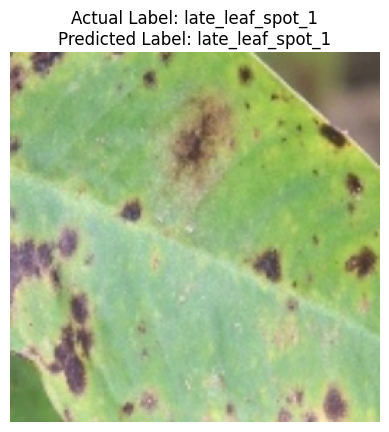

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained Xception model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Xception.h5')

# Load the leaf image and resize it to 299x299 (Xception model input size)
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/late_leaf_spot_1/23.jpg"
img = image.load_img(img_path, target_size=(256, 256))  # Adjust the target size to 299x299
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)

# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label ="late_leaf_spot_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 3s 3s/step


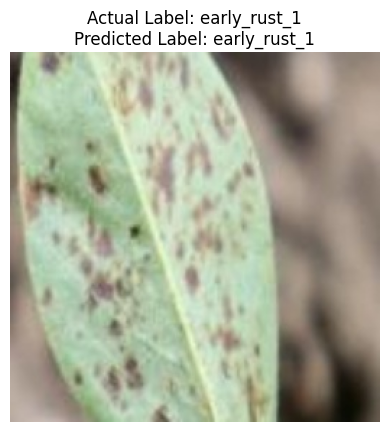

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained Xception model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Xception.h5')

# Load the leaf image and resize it to 299x299 (Xception model input size)
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/early_rust_1/dr_0_2756.jpg"
img = image.load_img(img_path, target_size=(256, 256))  # Adjust the target size to 299x299
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)

# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label ="early_rust_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 2s 2s/step


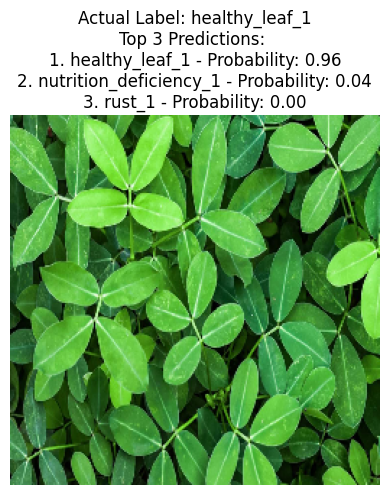

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained Xception model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/Xception.h5')

# Load the leaf image and resize it to 299x299 (Xception model input size)
img_path = "Downloads/123/456/HTML/healthy.jpg"
img = image.load_img(img_path, target_size=(256, 256))  # Adjust the target size to 299x299
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)

# Decode the predictions to the top 3 class labels and probabilities
top_predictions = np.argsort(preds[0])[-3:][::-1]  # Get the indices of the 3 predicted classes

# Get the class labels and their associated probabilities
class_labels = []
probabilities = []
for pred in top_predictions:
    if pred == 0:
        class_label = "early_leaf_spot_1"
    elif pred == 1:
        class_label = "early_rust_1"
    elif pred == 2:
        class_label = "healthy_leaf_1"
    elif pred == 3:
        class_label = "late_leaf_spot_1"
    elif pred == 4:
        class_label = "nutrition_deficiency_1"
    elif pred == 5:
        class_label = "rust_1"
    else:
        class_label = "Unknown"
    class_labels.append(class_label)
    probability = preds[0][pred]
    probabilities.append(probability)

# Actual label of the leaf image
actual_label = "healthy_leaf_1"  # Replace with the actual label of the image

# Display the image along with the actual label and top predicted labels and probabilities
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nTop 3 Predictions: \n1. {class_labels[0]} - Probability: {probabilities[0]:.2f}\n2. {class_labels[1]} - Probability: {probabilities[1]:.2f}\n3. {class_labels[2]} - Probability: {probabilities[2]:.2f}")
plt.axis('off')
plt.show()

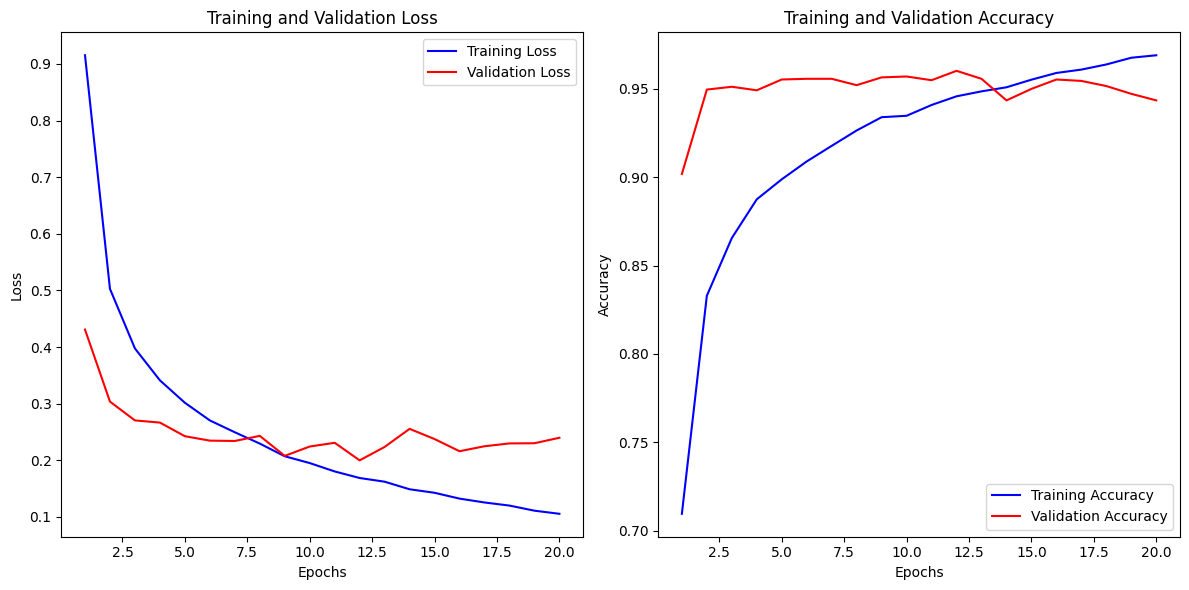

In [1]:
import matplotlib.pyplot as plt

# Data from the training process
training_loss = [0.9154, 0.5028, 0.3976, 0.3413, 0.3017, 0.2705, 0.2496, 0.2296, 0.2072, 0.1952, 0.1804, 0.1688, 0.1623, 0.1489, 0.1427, 0.1324, 0.1256, 0.1201, 0.1111, 0.1056]
training_accuracy = [0.7097, 0.8329, 0.8655, 0.8874, 0.8987, 0.9088, 0.9176, 0.9263, 0.9338, 0.9346, 0.9407, 0.9456, 0.9484, 0.9507, 0.9550, 0.9588, 0.9607, 0.9636, 0.9674, 0.9688]

validation_loss = [0.4310, 0.3037, 0.2705, 0.2667, 0.2426, 0.2348, 0.2342, 0.2432, 0.2079, 0.2244, 0.2310, 0.2000, 0.2237, 0.2556, 0.2376, 0.2161, 0.2249, 0.2299, 0.2302, 0.2399]
validation_accuracy = [0.9017, 0.9494, 0.9510, 0.9490, 0.9551, 0.9555, 0.9555, 0.9519, 0.9563, 0.9568, 0.9547, 0.9600, 0.9555, 0.9433, 0.9498, 0.9551, 0.9543, 0.9514, 0.9470, 0.9433]

epochs = range(1, 21)  # Assuming 20 epochs

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
